In [1]:
# Data Wrangling Workshop Chapter 5 and 6 Activities Program
# DSC 540
# Weeks 5 and 6
# Data Preparation Assignment Weeks 5 and 6
# David Berberena
# 4/21/2024

# Program Start

## Activity 5.01

In [2]:
# 1. Read the page using bs4.

# In order to use bs4 and the BeautifulSoup class, we must import the library. Pandas will also need to be imported for 
# general data manipulation.

from bs4 import BeautifulSoup
import pandas as pd

# The the HTML file needs to be read using the open() and close() functions as we are simply reading the HTML file, 
# subjecting the contents of the HTML file to the BeautifulSoup() function, storing those contents in a variable, and 
# closing the file, not altering or writing to it in any way.

# To accurately read the HTML file, the encoding parameter of the open() function needs to be set to UTF-8 as that is the 
# encoding that the Wikipedia page uses under meta charset according to the Inspect tool in Google Chrome. Without this 
# addition, an error is thrown.

wiki_countries = open("List_of_countries_GDP.htm", "r", encoding = "utf-8")
country_soup = BeautifulSoup(wiki_countries)
wiki_countries.close()

# To check whether BeautifulSoup did work on the HTML file contents, I will print the type of the country_soup variable.

print(type(country_soup))

<class 'bs4.BeautifulSoup'>


In [3]:
# 2. Find the table structure you will need to deal with (how many tables are there?).

# To see how many tables there are within the soup contents, the find_all() function within the bs4 library allows us to 
# find as many objects belonging to the label we as developers input as an argument. As we are looking for all of the 
# tables within the contents, the argument will be the word "table." 

country_soup_tables = country_soup.find_all("table")
print("The total number of tables is:", len(country_soup_tables))

The total number of tables is: 9


In [4]:
# 3. Find the right table using bs4.

# This time, we simply need to find the correct table out of the nine that we have in the soup contents. After looking at 
# the output of the country_soup_tables variable and seeing that the table we need is the second of the nine tables, we can 
# utilize the find() function to look at the one table whose class is called "wikitable"|} as it shows in the Inspect tool 
# in Chrome.

country_table = country_soup.find("table", {"class": '"wikitable"|}'})

# To check whether the find() function found the right table, I will print the pretty version of the country_table variable 
# using the prettify() function.

print(country_table.prettify())

<table class='"wikitable"|}' style="margin:auto; width:100%;">
 <tbody>
  <tr>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en.wikipedia.org/wiki/International_Monetary_Fund" title="International Monetary Fund">
      International Monetary Fund
     </a>
     (2017)
    </b>
    <sup class="reference" id="cite_ref-GDP_IMF_1-2">
     <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-GDP_IMF-1">
      [1]
     </a>
    </sup>
   </td>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en.wikipedia.org/wiki/World_Bank" title="World Bank">
      World Bank
     </a>
     (2017)
    </b>
    <sup class="reference" id="cite_ref-worldbank_20-0">
     <a href="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#cite_note-worldbank-20">
      [20]
     </a>
    </sup>
   </td>
   <td style="width:33%; text-align:center;">
    <b>
     Per the
     <a href="https://en

In [5]:
# 4. Separate the source names and their corresponding data.

# Upon looking at the pretty version of the country_table variable and the actual table on the web page, I figured out that 
# I needed to call the tbody from country_table and using the find() function to look for the first table row by using 'tr' 
# as the argument. Once I had access to the first row of data in the body of the table, I did a list comprehension on that 
# first row to look for the data entries within that row (denoted by 'td'), convert the sources into a list, which is then 
# stored as a variable. The length of sources is printed to show that I captured the three sources outlined in the table.

table_source = country_table.tbody.find('tr')
table_source_list = [source for source in table_source.find_all('td')]
print(len(table_source_list))

3


In [6]:
# 5. Get the source names from the list of sources you have created.

# Looking at the prettify() function on the country_table variable under the 'td' designation, the names of the sources are 
# hidden within the 'a' designation. So I made a list comprehension to pull the text out of the 'a' designation from each 
# 'td' element in my list of sources using the getText() function. As there are more than 1 'a' element in each 'td' 
# designation, I made sure to call the first value, which is indexed at 0. 

source_names = [td.find_all('a')[0].getText() for td in table_source_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [7]:
# 6. Separate the header and data from the data that you separated before for the first source only, and then create a 
# DataFrame using that.

# Accomplishing this step required me to go back to the country_table variable to parse through it by finding the first 
# 'thead' element and then finding all of the 'th' elements within that 'thead' element.

df_headers = [th.getText().strip() for th in country_table.find('thead').find_all('th')]
df_headers

['Rank', 'Country', 'GDP(US$MM)']

In [8]:
# Now I need to find all of the data regarding the IMF source, and by looking at the country_table prettify() output, I can 
# see that the second 'tbody' element (index 1) holds that data. The rows from this element are captured in a variable, 
# which is then used in a list comprehension to strip the data points from the table using the strip() and getText() 
# functions once the data points are parsed from the rows. The headers and data points are then placed into the data frame. 
# Once the dataset has been created, I removed the commas from the GDP(US$MM) column and the head() function is used to 
# show the final dataset's first few observations.

IMF_rows = country_table.find_all('tbody')[1].find_all('tr')

IMF_data = [[td.get_text().strip() for td in tr.find_all('td')] for tr in IMF_rows]

IMF_dataset = pd.DataFrame(IMF_data, columns=df_headers)

IMF_dataset['GDP(US$MM)'] = IMF_dataset['GDP(US$MM)'].str.replace(',', '')

IMF_dataset.head()

,Rank,Country,GDP(US$MM)
0,,World[19],79865481
1,1,United States,19390600
2,2,China[n 1],12014610
3,3,Japan,4872135
4,4,Germany,3684816


In [9]:
# 7. Repeat the last task for the other two data sources.

# For this data source, the GDP is formatted incorrectly, so I created the DataFrame object the same as the first dataset 
# (the information for the second data source was held in the second index of the 'tbody' element) and altered the 
# GDP(US$MM) column by removing the spade symbol and the accompanying unnecessary numbers with the str.replace() and 
# str.split() functions. I then needed to turn the column into a NumPy integer data type so the column would print out.

WB_rows = country_table.find_all('tbody')[2].find_all('tr')

WB_data = [[td.get_text().strip() for td in tr.find_all('td')] for tr in WB_rows]

WB_dataset = pd.DataFrame(WB_data, columns=df_headers)

WB_dataset['GDP(US$MM)'] = WB_dataset['GDP(US$MM)'].str.replace(',', '').str.split('♠').str[-1]

WB_dataset['GDP(US$MM)'] = WB_dataset['GDP(US$MM)'].astype('int64')

# The head() function is to visualize the creation of the dataset.

WB_dataset.head()

,Rank,Country,GDP(US$MM)
0,,World,80683787
1,1,United States,19390604
2,,European Union[23],17277698
3,2,China[n 4],12237700
4,3,Japan,4872137


In [10]:
# The third dataset is crafted the same way as the second, with the exception of the 'tbody' index change.

UN_rows = country_table.find_all('tbody')[3].find_all('tr')

UN_data = [[td.get_text().strip() for td in tr.find_all('td')] for tr in UN_rows]

UN_dataset = pd.DataFrame(UN_data, columns=df_headers)

UN_dataset['GDP(US$MM)'] = UN_dataset['GDP(US$MM)'].str.replace(',', '').str.split('♠').str[-1]

UN_dataset['GDP(US$MM)'] = UN_dataset['GDP(US$MM)'].astype('int64')

# The head() function is to visualize the creation of the dataset.

UN_dataset.head()

,Rank,Country,GDP(US$MM)
0,,World[24],75648448
1,1,United States,18624475
2,2,China[n 4],11218281
3,3,Japan,4936211
4,4,Germany,3477796


## Activity 6.01

In [11]:
# 1. Read the visit_data.csv file.

# I need to read the CSV file in using read_csv() and use the head() function to verify that the data has been captured.

visit_data = pd.read_csv('visit_data.csv')

visit_data.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [12]:
# I will output the shape of the dataset as well as this information is needed later.

visit_data.shape

(1000, 7)

In [13]:
# 2. Check for duplicates.

# To do this, I created an empty list to capture the duplicated values. I then made a for loop that checks each column for 
# any duplicate values by using the duplicated() function, which returns a Boolean statement of True or False for each 
# value within that column, and the any() function, which allows the duplicated() simply to check for the presence of a 
# duplicate value to return True or False for the whole column. I then appended the Boolean statements to the list and 
# created a DataFrame object with the column names and theur respective Booleab statements whether there are any duplicate 
# values within that column or not. 

duplicated_cols = []

for col in visit_data.columns:
    duplicated_answers = any(visit_data[col].duplicated())
    duplicated_cols.append(duplicated_answers)
    
df_to_see_duplicated_cols = pd.DataFrame(duplicated_cols, index=visit_data.columns)
df_to_see_duplicated_cols

,0
id,False
first_name,True
last_name,True
email,False
gender,True
ip_address,False
visit,True


In [14]:
# 3. Check whether any essential column contains NaN.

# This is also accomplished with the same methodology as the last block of code. The only thing that changed was the 
# duplicated() function, which is now the isna() function, and is responsible for finding missing values (NaN).

nan_cols = []

for col in visit_data.columns:
    nan_answers = any(visit_data[col].isna())
    nan_cols.append(nan_answers)
    
df_to_see_nan_cols = pd.DataFrame(nan_cols, index=visit_data.columns)
df_to_see_nan_cols

,0
id,False
first_name,True
last_name,True
email,False
gender,True
ip_address,False
visit,True


In [15]:
# 4. Get rid of the outliers.

# The only column we need to address for outliers is the visit column, as this column contains data that can hold potential 
# outliers. The outliers are the NaN values that we have already identified are present in this column. So we will remove 
# them with the dropna() function focused only on the visit column, as other columns have NaN values as well. The shape is 
# printed as well to see the difference in size.

visit_data_no_outliers = visit_data.dropna(subset=['visit'])

visit_data_no_outliers.shape

(974, 7)

In [16]:
# 5. Report the size difference.

# This simply involves comparing the number of rows in each dataset.

print('The size of the initial dataset with outliers is:', visit_data.shape[0])
print('The size of the subset with outliers (missing values) removed is:', visit_data_no_outliers.shape[0])
print('The difference in size between the two is:', visit_data.shape[0] - visit_data_no_outliers.shape[0])

The size of the initial dataset with outliers is: 1000
The size of the subset with outliers (missing values) removed is: 974
The difference in size between the two is: 26


Text(0.5, 1.0, 'Box Plot of the Visit Variable')

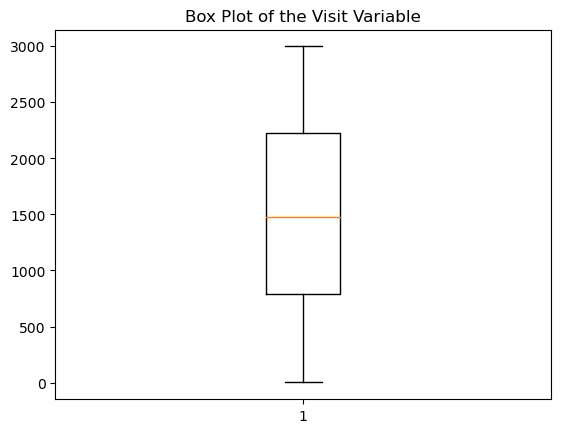

In [17]:
# 6. Create a box plot to check for outliers.

# Matplotlib is needed to make a box plot, so I will import that library now.

import matplotlib.pyplot as plt

# Since we are only dealing with the visit variable for outliers, I will plot that variable here.

plt.boxplot(visit_data_no_outliers['visit'])
plt.title('Box Plot of the Visit Variable')

In [26]:
# 7. Get rid of any outliers.

# According to the textbook, the outliers in the box plot are those points below 100 and above 2900. I have already 
# attempted to filter out any additional outliers in the traditional ways like computing the z-scores for each value in the 
# visit column and getting rid of them if the absolute value of the z-scores are above 3, using the Interquartile Range 
# method, and the whisker test, yet they do not equate to the textbook's seemingly arbitrary definition of additional 
# outliers. So I will simply use the book's parameters concerning the outlier values.

# I can subset the data here using the less than or equal to 2900 and greater than or equal to 100 parameters as 
# mathematical expressions. Using the ampersand operator allows me to subset the data at one time using both conditional 
# statements to craft the finalized dataset. The shape of the dataset is called (specifically index 0) to realize the 
# change in the number of observations.

final_visit = visit_data_no_outliers[(visit_data_no_outliers['visit'] <= 2900) & (visit_data_no_outliers['visit'] >= 100)]

print('After getting rid of outliers the new size of the data is:', final_visit.shape[0])

After getting rid of outliers the new size of the data is: 923


## Insert data into a SQL database

In [23]:
# Create a table with the following data below that you will create yourself:
# a. Name, Address, City, State, Zip, Phone Number
# b. Add at least 10 rows of data and submit your code with a query generating your results.

# After looking at the textbook to see how to do this in Python, I have seen that the sqlite3 library is designated for 
# this purpose, so I will import it here.

import sqlite3

# To make a connection and make a new database within SQL, I need to use the connect() within sqlite3.

new_database = sqlite3.connect('personal_info.sqlite')

# Upon more research on SQL databases, I have chosen to create a cursor object next, which allows the manipulation of the 
# rows of information I need to generate. This is done with the cursor() function.

new_db_cursor = new_database.cursor()

# The execute() function provides the ability to create a new table within the database. I will place the label names and 
# expected data types here in the body of the execute() function. I have made each variable name expect a variable-length  
# character string (VARCHAR) to encompass all potential inputs. I also have specified the length of 100 to capture any and 
# all reasaonable inputs.

new_db_cursor.execute('''
    CREATE TABLE IF NOT EXISTS Veggietable_People_Directory (
        name VARCHAR(100),
        address VARCHAR(100),
        city VARCHAR(100),
        state VARCHAR(100),
        zip VARCHAR(100),
        phone_number VARCHAR(100),
        PRIMARY KEY (name, address)
    )
''')

# To add the ten rows of data that need to go into the table, I need to create a list of tuples encompassing the 
# information desired. To generate the data, I just made up the information (Yes I thought of food since I'm a chef).

random_people_data = [
    ('Tom Ato', '111 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7890'),
    ('Brocco Lini', '112 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7891'),
    ('Kale Green', '113 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7892'),
    ('Spinach Green', '114 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7893'),
    ('Mandarin Orange', '115 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7894'),
    ('Toma Tillo', '116 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7895'),
    ('Jala Peno', '117 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7896'),
    ('Water Melon', '118 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7897'),
    ('Ginger Root', '119 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7898'),
    ('Ruta Baga', '120 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7899')
]

# Now with the executemany() function on the cursor, I can place the data I made up into the table I created.

new_db_cursor.executemany('''
    INSERT INTO Veggietable_People_Directory (name, address, city, state, zip, phone_number)
    VALUES (?, ?, ?, ?, ?, ?)
''', random_people_data)

# Now that the table is complete, I need to commit the table's completion to the created database with the commit() 
# function.

new_database.commit()

# In order to visualize the table that was created, I now need to make another execute command with the execute() function 
# that looks at the data within the People-Directory table I made. To grab that data, the fetchall() function is used.

new_db_cursor.execute('SELECT * FROM Veggietable_People_Directory')
table_rows = new_db_cursor.fetchall()

# The below for loop is designed to access each row of data within the table and output them.

for row in table_rows:
    print(row)

# Now that I have finished accessing the table, I need to close both the cursor object holding the table and the database.
new_db_cursor.close()
new_database.close()

('Tom Ato', '111 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7890')
('Brocco Lini', '112 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7891')
('Kale Green', '113 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7892')
('Spinach Green', '114 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7893')
('Mandarin Orange', '115 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7894')
('Toma Tillo', '116 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7895')
('Jala Peno', '117 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7896')
('Water Melon', '118 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7897')
('Ginger Root', '119 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7898')
('Ruta Baga', '120 Soil Rd', 'Veggietown', 'VT', '98765', '123-456-7899')
